# Deep Learning Lab Experiment- 4

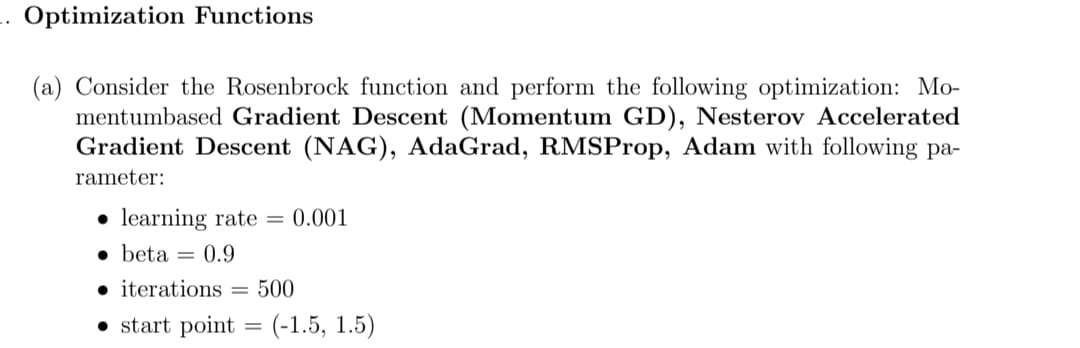

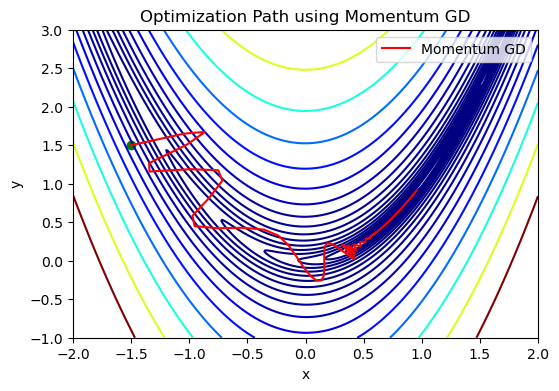

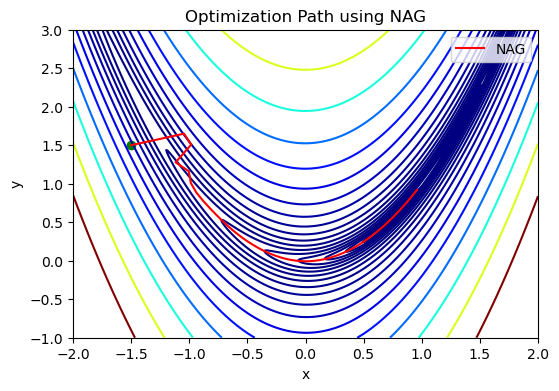

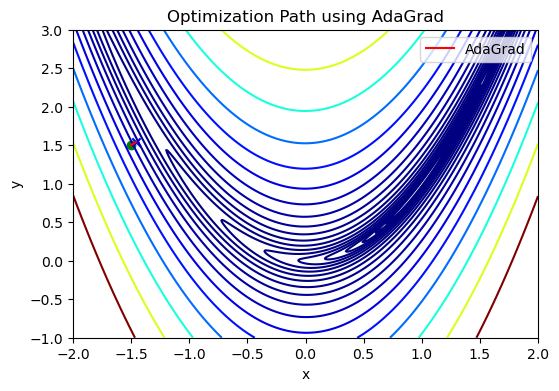

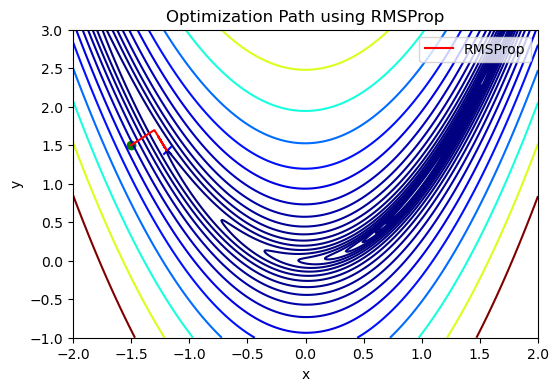

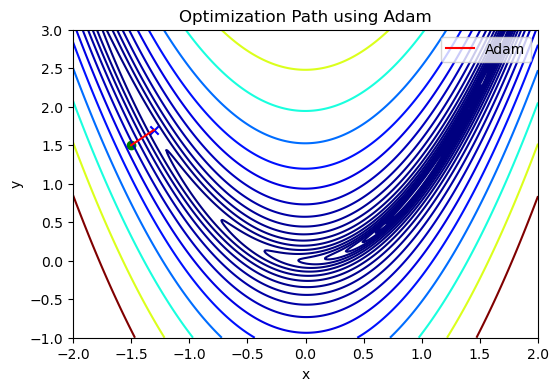

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Compute gradients
def gradients(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    dfdy = 200 * (y - x ** 2)
    return np.array([dfdx, dfdy])

# Optimization function
def optimize(method, lr=0.001, beta=0.9, iterations=500, start=(-1.5, 1.5)):
    x, y = np.array(start, dtype=np.float64)
    history = [(x, y)]
    
    v = np.zeros(2)  # For Momentum & NAG
    g = np.zeros(2)  # For AdaGrad & RMSProp
    m = np.zeros(2)  # For Adam
    t = 0
    epsilon = 1e-8
    beta2 = 0.999  # Adam & RMSProp
    
    for i in range(iterations):
        grad = gradients(x, y)
        t += 1
        
        if method == 'Momentum GD':
            v = beta * v + lr * grad
            x, y = np.array([x, y]) - v
            
        elif method == 'NAG':
            lookahead = np.array([x, y]) - beta * v
            grad = gradients(lookahead[0], lookahead[1])
            v = beta * v + lr * grad
            x, y = np.array([x, y]) - v
            
        elif method == 'AdaGrad':
            g += grad ** 2
            x, y = np.array([x, y]) - (lr / (np.sqrt(g) + epsilon)) * grad
            
        elif method == 'RMSProp':
            g = beta * g + (1 - beta) * grad ** 2
            x, y = np.array([x, y]) - (lr / (np.sqrt(g) + epsilon)) * grad
            
        elif method == 'Adam':
            m = beta * m + (1 - beta) * grad
            g = beta2 * g + (1 - beta2) * grad ** 2
            m_hat = m / (1 - beta ** t)
            g_hat = g / (1 - beta2 ** t)
            x, y = np.array([x, y]) - (lr / (np.sqrt(g_hat) + epsilon)) * m_hat
            
        history.append((x, y))
    
    return np.array(history)

# Run optimization methods
methods = ['Momentum GD', 'NAG', 'AdaGrad', 'RMSProp', 'Adam']
results = {method: optimize(method) for method in methods}

# Plot separate results
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock(X, Y)

for i, method in enumerate(methods):
    plt.figure(figsize=(6, 4))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    plt.plot(results[method][:, 0], results[method][:, 1], label=method, color='r')
    plt.scatter(*results[method][0], color='g', marker='o')  # Start point
    plt.scatter(*results[method][-1], color='b', marker='x')  # End point
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Optimization Path using {method}')
    plt.show()


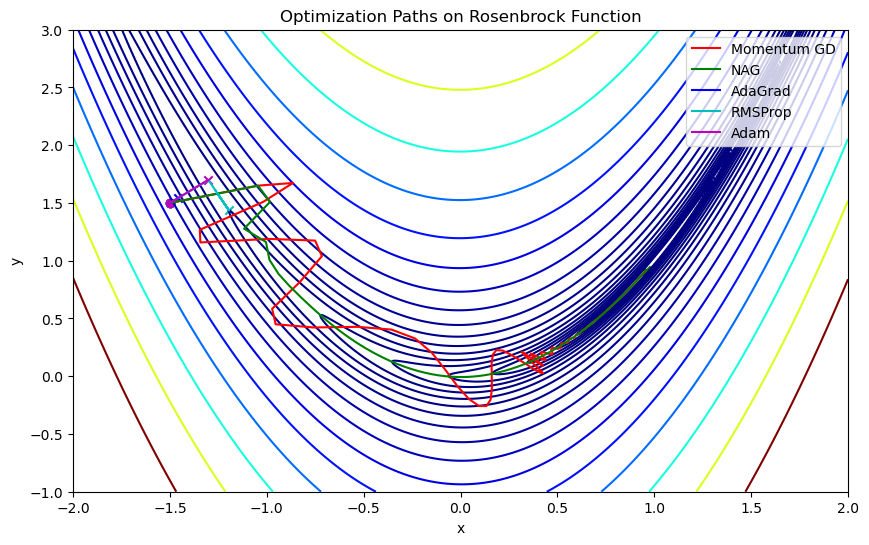

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Compute gradients
def gradients(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    dfdy = 200 * (y - x ** 2)
    return np.array([dfdx, dfdy])

# Optimization function
def optimize(method, lr=0.001, beta=0.9, iterations=500, start=(-1.5, 1.5)):
    x, y = np.array(start, dtype=np.float64)
    history = [(x, y)]
    
    v = np.zeros(2)  # For Momentum & NAG
    g = np.zeros(2)  # For AdaGrad & RMSProp
    m = np.zeros(2)  # For Adam
    t = 0
    epsilon = 1e-8
    beta2 = 0.999  # Adam & RMSProp
    
    for i in range(iterations):
        grad = gradients(x, y)
        t += 1
        
        if method == 'Momentum GD':
            v = beta * v + lr * grad
            x, y = np.array([x, y]) - v
            
        elif method == 'NAG':
            lookahead = np.array([x, y]) - beta * v
            grad = gradients(lookahead[0], lookahead[1])
            v = beta * v + lr * grad
            x, y = np.array([x, y]) - v
            
        elif method == 'AdaGrad':
            g += grad ** 2
            x, y = np.array([x, y]) - (lr / (np.sqrt(g) + epsilon)) * grad
            
        elif method == 'RMSProp':
            g = beta * g + (1 - beta) * grad ** 2
            x, y = np.array([x, y]) - (lr / (np.sqrt(g) + epsilon)) * grad
            
        elif method == 'Adam':
            m = beta * m + (1 - beta) * grad
            g = beta2 * g + (1 - beta2) * grad ** 2
            m_hat = m / (1 - beta ** t)
            g_hat = g / (1 - beta2 ** t)
            x, y = np.array([x, y]) - (lr / (np.sqrt(g_hat) + epsilon)) * m_hat
            
        history.append((x, y))
    
    return np.array(history)

# Run optimization methods
methods = ['Momentum GD', 'NAG', 'AdaGrad', 'RMSProp', 'Adam']
results = {method: optimize(method) for method in methods}

# Plot results
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
Z = rosenbrock(X, Y)
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

colors = ['r', 'g', 'b', 'c', 'm']
for i, method in enumerate(methods):
    plt.plot(results[method][:, 0], results[method][:, 1], color=colors[i], label=method)
    plt.scatter(*results[method][0], color=colors[i], marker='o')  # Start point
    plt.scatter(*results[method][-1], color=colors[i], marker='x')  # End point

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimization Paths on Rosenbrock Function')
plt.show()
